In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


# File to Load (Remember to Change These)
covid = "covid-clinical-trial_data_cleandata.csv"

# Read Purchasing File and store into Pandas data frame
covid_df = pd.read_csv(covid)
covid_df.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,1-Jun-20,22-Jan-21,11-Jun-20,United States,NaN
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Industry|Other,Interventional,21-Jul-20,13-Oct-20,30-Jun-20,United Kingdom,0.4891
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,22-May-20,23-Dec-20,24-Jun-20,Spain,NaN
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,20-Apr-20,16-Jul-20,21-Apr-20,Portugal,NaN
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,29-Sep-20,15-Apr-21,8-Oct-20,Pakistan,NaN


In [2]:
#columns to delete
remove_columns = covid_df.drop(columns=['Study Results','Outcome Measures','Funded Bys','First Posted','p-values'])
remove_columns.head()

,Rank,NCT Number,Title,Status,Conditions,Interventions,Gender,Age,Phases,Enrollment,Study Type,Start Date,Completion Date,Locations
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,COVID-19,Drug: Infliximab,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Interventional,1-Jun-20,22-Jan-21,United States
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,COVID-19,Drug: C21|Drug: Placebo,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Interventional,21-Jul-20,13-Oct-20,United Kingdom
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,COVID-19,Drug: Tocilizumab,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Interventional,22-May-20,23-Dec-20,Spain
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,COVID-19,Other: Exposure,All,"18 Years and older (Adult, Older Adult)",NaN,115,Observational,20-Apr-20,16-Jul-20,Portugal
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Interventional,29-Sep-20,15-Apr-21,Pakistan


In [3]:
# Checking the number of studies
trial_count = covid_df["NCT Number"].count()
trial_count

1123

In [4]:
#Count phases
phase_count = covid_df["Phases"].count()
phase_count

511

In [5]:
#Count Countries
Countries_count = covid_df["Locations"].count
Countries_count

<bound method Series.count of 0         United States
1        United Kingdom
2                 Spain
3              Portugal
4              Pakistan
             ...       
1118             Turkey
1119          Argentina
1120             Turkey
1121             France
1122             Israel
Name: Locations, Length: 1123, dtype: object>

In [6]:

# check any duplicate trials by NCT number that shows up for NCT Number and Phases. 
#duplicate_rows = covid_trial_df[covid_trial_df.duplicated(['NCT Number', 'Phases' ])]
#duplicate_rows
duplicate_rows = covid_df[covid_df.duplicated(['Locations'])]
duplicate_rows



,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
5,6,NCT04466644,COVID-19: A Prevalence Study of Two ART Centre...,Completed,No Results Available,COVID-19,Diagnostic Test: ELISA|Diagnostic Test: RT-PCR,Prevalence of contagiousness in asymptomatic i...,All,"18 Years and older (Adult, Older Adult)",NaN,340,Industry,Observational,8-Jun-20,25-Aug-20,10-Jul-20,United States,NaN
8,9,NCT04404179,Setting up a COVID-19 Care Facility at a Priso...,Completed,No Results Available,COVID-19,Other: COVID-19 FACILITY,Recovery|Mortality|ICU admission,All,"Child, Adult, Older Adult",NaN,69,Other,Observational,27-Mar-20,2-May-20,27-May-20,Pakistan,NaN
10,11,NCT04389658,Contagiousness and Immunogenicity Status of CO...,Completed,No Results Available,COVID-19,NaN,Prevalence of contagiousness in asymptomatic i...,All,"Child, Adult, Older Adult",NaN,1526,Industry,Observational,7-May-20,25-Aug-20,15-May-20,Spain,NaN
12,13,NCT04392141,Colchicine Plus Phenolic Monoterpenes to Treat...,Completed,Has Results,COVID-19,Drug: Standard Treatment|Drug: Oral administra...,Mortality Rate|SpO2|Length of Hospitalization|...,All,"10 Years and older (Child, Adult, Older Adult)",Phase 1|Phase 2,120,Other,Interventional,1-Apr-20,1-Nov-20,18-May-20,Islamic Republic of,0.0318
14,15,NCT04449718,Vitamin D Supplementation in Patients With COV...,Completed,No Results Available,COVID-19,Dietary Supplement: Vitamin D|Dietary Suppleme...,Length of hospitalization|Mortality|Number of ...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,240,Other,Interventional,1-Jun-20,7-Oct-20,29-Jun-20,Brazil,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,1119,NCT04407000,Bioequivalence Study of Favipiravir 200 mg Fil...,Completed,No Results Available,Bioequivalence,Drug: Test: Favipiravir 200 mg (LOQULAR)|Drug:...,Primary PK End Points AUC0-tlast|Primary PK En...,Male,20 Years to 40 Years (Adult),Phase 1,30,Industry|Other,Interventional,23-Jun-20,8-Aug-20,29-May-20,Turkey,NaN
1119,1120,NCT04763304,Self-contamination Following Removal of Two Pe...,Completed,No Results Available,Personal Protective Equipment|Self Contamination,Other: Gown personal protective equipment (PPE...,Mean within-participant difference in self-con...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,60,Other,Interventional,1-Sep-20,18-Nov-20,21-Feb-21,Argentina,NaN
1120,1121,NCT04386876,Bioequivalence Study of Lopinavir/Ritonavir 20...,Completed,No Results Available,Bioequivalence,Drug: Lopinavir/Ritonavir 200 mg/50 mg Film Ta...,Primary PK End Points,Male,20 Years to 40 Years (Adult),Phase 1,30,Industry|Other,Interventional,30-Apr-20,11-Jun-20,13-May-20,Turkey,NaN
1121,1122,NCT04621552,Virtual Simulation for Woven EndoBridge Device...,Completed,No Results Available,Aneurysm|Intracranial Aneurysm,Device: WEB embolization,Median duration of the intervention|Median rad...,All,"18 Years and older (Adult, Older Adult)",NaN,186,Other,Observational,1-Jan-15,30-Oct-20,9-Nov-20,France,NaN


In [7]:
#Bar Grapth Testing for reference
# Create an array that contains the number of Phases
#Phases = [0, 1, 2, 3, 4]
#x_axis = np.arange(len(Phases))




In [8]:
#plt.bar(x_axis, Phases, color='r', alpha=0.5, align="center")

In [68]:
# Split up our data into groups based upon 'Phases','Location','Enrollment'
Phases_groups = covid_df.groupby(['NCT Number','Phases','Enrollment','Study Type','Completion Date','Locations'])

# Create a new variable that holds the sum of our groups
sum_it_up = Phases_groups.sum()
sum_it_up.head(1000)



,,,,,,Rank
NCT Number,Phases,Enrollment,Study Type,Completion Date,Locations,
NCT03852537,Phase 2,44,Interventional,15-Mar-21,United States,1100
NCT04160975,Not Applicable,2902,Interventional,19-Feb-21,United States,1071
NCT04244591,Phase 2|Phase 3,80,Interventional,13-Apr-20,China,139
NCT04252885,Phase 4,86,Interventional,31-May-20,China,1060
NCT04261517,Phase 3,30,Interventional,25-Feb-20,China,377
...,...,...,...,...,...,...
NCT04883203,Phase 3,130,Interventional,31-Oct-20,Tunisia,177
NCT04885777,Not Applicable,50,Interventional,30-Oct-20,Turkey,1113
NCT04894409,Not Applicable,231,Interventional,29-Sep-20,Mexico,242


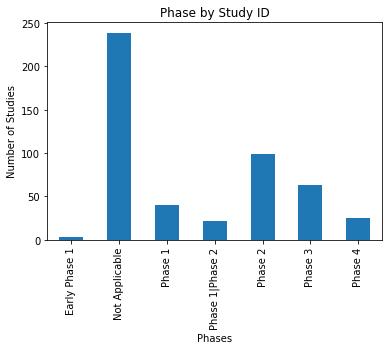

<Figure size 432x288 with 0 Axes>

In [10]:
# Split up our data into groups based upon 'gender'
Phases_groups = covid_df.groupby('Phases')
# Find out how many of each Study ID assigned with phases
NCT_Number = Phases_groups['Enrollment'].count()
# Drop the 'phases' row that is contained within our group
NCT_Number = NCT_Number.drop(NCT_Number.index[5])
# Chart our data, give it a title, and label the axes
Phases_chart = NCT_Number.plot(kind="bar", title="Phase by Study ID")
Phases_chart.set_xlabel("Phases")
Phases_chart.set_ylabel("Number of Studies")

plt.show()
plt.tight_layout()



In [ ]:
#Pie Chart for Study Types



In [11]:
# Figure out the minimum and maximum Enrollment for all studies
print(covid_df["Enrollment"].max())
print(covid_df["Enrollment"].min())

12000000
1


In [12]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 199999, 399999, 599999, 799999, 999999,
        1999999, 2999999, 3999999, 4999999, 5999999,6999999,7999999,200000000]

# Create labels for these bins
group_labels = ["0 to 199k", "200k to 399k", "400k to 599k", "600k to 799k", "800k to 999k", "1mil to 2mil",
                "2mil to 3mil", "3mil to 4mil", "4mil to 5mil", "5mil to 6mil","6mil to 7mil","7mil to 8 mil","8mil to 200mil"]

In [13]:
# Slice the data and place it into bins
pd.cut(covid_df["Enrollment"], bins, labels=group_labels).head()

0    0 to 199k
1    0 to 199k
2    0 to 199k
3    0 to 199k
4    0 to 199k
Name: Enrollment, dtype: category
Categories (13, object): ['0 to 199k' < '200k to 399k' < '400k to 599k' < '600k to 799k' ... '5mil to 6mil' < '6mil to 7mil' < '7mil to 8 mil' < '8mil to 200mil']

<AxesSubplot:>

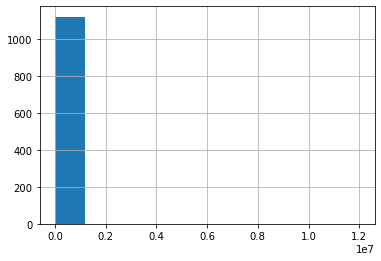

In [14]:
covid_df.Enrollment.hist()

In [15]:
# Place the data series into a new column inside of the DataFrame
covid_df["Enrollment Group"] = pd.cut(covid_df["Enrollment"], bins, labels=group_labels)
covid_df.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values,Enrollment Group
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,1-Jun-20,22-Jan-21,11-Jun-20,United States,NaN,0 to 199k
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Industry|Other,Interventional,21-Jul-20,13-Oct-20,30-Jun-20,United Kingdom,0.4891,0 to 199k
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,22-May-20,23-Dec-20,24-Jun-20,Spain,NaN,0 to 199k
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,20-Apr-20,16-Jul-20,21-Apr-20,Portugal,NaN,0 to 199k
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,29-Sep-20,15-Apr-21,8-Oct-20,Pakistan,NaN,0 to 199k


In [16]:
# Create a GroupBy object based upon "Phase Group"
Enrollment_Group = covid_df.groupby("Enrollment Group")

# Find how many rows fall into each bin
print(Enrollment_Group["Phases"].count())

# Get the average of each column within the GroupBy object
Enrollment_Group[["Enrollment","Start Date"]].mean()
Enrollment_Group.head()

Enrollment Group
0 to 199k         510
200k to 399k        0
400k to 599k        1
600k to 799k        0
800k to 999k        0
1mil to 2mil        0
2mil to 3mil        0
3mil to 4mil        0
4mil to 5mil        0
5mil to 6mil        0
6mil to 7mil        0
7mil to 8 mil       0
8mil to 200mil      0
Name: Phases, dtype: int64


,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values,Enrollment Group
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,1-Jun-20,22-Jan-21,11-Jun-20,United States,NaN,0 to 199k
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Industry|Other,Interventional,21-Jul-20,13-Oct-20,30-Jun-20,United Kingdom,0.4891,0 to 199k
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,22-May-20,23-Dec-20,24-Jun-20,Spain,NaN,0 to 199k
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,20-Apr-20,16-Jul-20,21-Apr-20,Portugal,NaN,0 to 199k
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,29-Sep-20,15-Apr-21,8-Oct-20,Pakistan,NaN,0 to 199k
42,43,NCT04331171,Epidemiological Observation From a Smartphone ...,Completed,No Results Available,COVID-19,Device: Web application users,To assess of the evolution of the number of ca...,All,"18 Years and older (Adult, Older Adult)",NaN,12000000,Other|Industry,Observational,17-Mar-20,15-Nov-20,2-Apr-20,France,NaN,8mil to 200mil
259,260,NCT04460274,Forecast Number of Covid-19 Cases Worldwide,Completed,No Results Available,Covid-19,Other: Model Building|Other: Model validation,Number of Confirmed cases of Covid-19,All,"Child, Adult, Older Adult",NaN,7882471,Other,Observational,31-Dec-19,20-Jun-20,7-Jul-20,Turkey,NaN,7mil to 8 mil
792,793,NCT04407117,Appendicitis During the National Lockdown Duri...,Completed,No Results Available,Appendicitis,Behavioral: Lock-down and social distancing,Appendectomy|Postoperative length of stay|Mort...,All,"Child, Adult, Older Adult",NaN,6000000,Other,Observational,23-Mar-17,19-Apr-20,29-May-20,Denmark,NaN,6mil to 7mil
890,891,NCT04891276,Impact of COVID-19 Infection and Confinement o...,Completed,No Results Available,Diabetic Subjects With Hospital Stays,Other: Data collection,Frequency of lower limb amputations,All,"Child, Adult, Older Adult",NaN,3300000,Other,Observational,16-Oct-20,14-Apr-21,18-May-21,France,NaN,3mil to 4mil
901,902,NCT04370886,Recruit Blood Donors Via SMS During Epidemic o...,Completed,No Results Available,Blood Donation,Behavioral: blood donation SMS,Blood donation rate,All,18 Years to 60 Years (Adult),Not Applicable,456517,Other,Interventional,30-Apr-20,10-May-20,1-May-20,China,NaN,400k to 599k


In [59]:
# Labels for the sections (phases) of our pie chart for total studies
labels = ["Not Applicable", "Phase 1", "Phase 2", "Phase 3"]

# The values of each section of the pie chart
sizes =[30,95,160,220]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Phase 4" section from the others
explode = (0.1, 0.1, 0.1, 0.1)

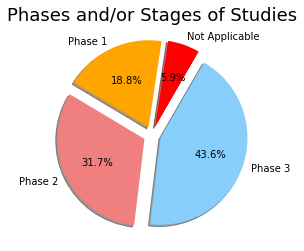

In [67]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=420)
plt.title("Phases and/or Stages of Studies", fontsize = 18) 
plt.show()
# Adding a legend to the chart and increasing its size 


In [19]:

#lsit top 5 drugs and relate phase number
#calculate the average data collected from Datasource


In [20]:
# Labels for the sections (phases) of our pie chart for total studies
labels = ["No Results Available", "Has Results"]

# The values of each section of the pie chart
sizes =[220,60]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Has Results" section from the others
explode = (0.1, 0,)

([<matplotlib.patches.Wedge at 0x7fdafc1fac10>,
 [Text(0.23777530891102117, -1.1762069981394725, 'No Results Available'),
  Text(-0.2179606493613971, 1.078189758497992, 'Has Results')],
 [Text(0.138702263531429, -0.6861207489146921, '78.6%'),
  Text(-0.11888762692439842, 0.5881035046352683, '21.4%')])

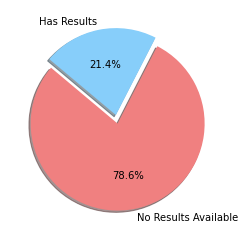

In [21]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [23]:
# clean phases row